In [76]:
import geopandas as gpd
import geemap
import ee
import os
import pandas as pd
import numpy as np
import shapely
import json
import ast

In [47]:
movies = pd.read_json(data.movies.url)

In [51]:
movies.to_json('movies.json', orient='records')

In [52]:
import json

In [55]:
with open('movies.json') as f:
    data = json.load(f)

In [58]:
df = pd.read_csv('hist_df.csv')
temp_df = df.copy()
temp_df['index'] = 'A'
hist = pd.melt(temp_df, id_vars=['index'])

In [75]:
data.movies.url

AttributeError: 'dict' object has no attribute 'movies'

In [74]:
df = pd.read_csv(data.movies.url)

AttributeError: 'dict' object has no attribute 'movies'

In [70]:
hist.to_json('movies.json', orient='split')
with open('movies.json') as f:
    data = json.load(f)

In [66]:
import altair as alt

In [72]:
altC = alt.Chart(data).transform_density(
    'value',
    as_=['value', 'density'], 
    cumulative=False,
    groupby=['variable']).mark_area(opacity=0.3).encode(
        x=alt.X("value:Q"),
        y=alt.Y("density:Q"),
        color=alt.Color("variable:N", legend=alt.Legend(title='Date', orient="top-left")),
        tooltip=[
            alt.Tooltip("variable:N", title="Date"),
            alt.Tooltip("value:Q", title='NDVI', format=",.4f"),
            alt.Tooltip('density:Q', title='Value', format=",.4f")
        ],
    )

In [73]:
altC

SchemaValidationError: Invalid specification

        altair.vegalite.v4.api.Chart->0, validating 'additionalProperties'

        Additional properties are not allowed ('index', 'data', 'columns' were unexpected)
        

alt.Chart(...)

In [6]:
a = alt.Chart(df).transform_density(
    '2013-03-29',
    as_=['2013-03-29', 'density'],
).mark_area(opacity=0.3).encode(
    x="2013-03-29:Q",
    y='density:Q',
)

b = alt.Chart(df).transform_density(
    '2021-09-26',
    as_=['2021-09-26', 'density'],
).mark_area(opacity=0.3, color='#EDCDA8').encode(
    x="2021-09-26:Q",
    y='density:Q'
)

a + b

alt.LayerChart(...)

In [7]:
from empiricaldist import Pmf, Cdf

In [8]:
df.head()

,2013-03-29,2021-09-26
0,0.534760,0.506805
1,0.713285,0.758126
2,0.676754,0.428956
3,0.725317,0.556082
4,0.315145,0.486240


In [9]:
pmf = Pmf.from_seq(df['2013-03-29'])

In [15]:
from sklearn.neighbors import KernelDensity

In [16]:
X = df.loc[:, '2013-03-29'].values[:, np.newaxis]

In [41]:
X.max()

0.8101646304130554

In [42]:
kde = KernelDensity(kernel='gaussian', bandwidth=X.std()).fit(X)
x=np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
log_density_values=kde.score_samples(x)
density=np.exp(log_density_values)
sum(density)

52.584080759725765

In [183]:
df = pd.read_csv('hist_df.csv')
df['index'] = 'A'
df = pd.melt(df, id_vars=['index'])
df

,index,variable,value
0,A,2013-03-29,0.534760
1,A,2013-03-29,0.713285
2,A,2013-03-29,0.676754
3,A,2013-03-29,0.725317
4,A,2013-03-29,0.315145
...,...,...,...
805,A,2021-09-26,0.700453
806,A,2021-09-26,0.606844
807,A,2021-09-26,0.526733
808,A,2021-09-26,-0.052017


In [185]:
alt.Chart(df).transform_density(
    'value',
    as_=['value', 'density'], 
    cumulative=False,
    groupby=['variable']
).mark_area(opacity=0.3).encode(
    x="value:Q",
    y='density:Q',
    color=alt.Color('variable:N', legend=alt.Legend(title='Date', orient="top-left"))
)

alt.Chart(...)

In [148]:
altC = (
    alt.Chart(df)
    .transform_fold([f"2013-03-29", f"2021-09-26"], as_=["Dates", "NDVI"])
    .transform_density()
    .mark_area(opacity=0.3)
    .encode(
        x=alt.X("NDVI:Q", bin=alt.Bin(maxbins=200)),
        y=alt.Y("count()", stack=None),
        color=alt.Color("Dates:N", legend=alt.Legend(orient="top-left")),
        tooltip=[
            alt.Tooltip("Dates:N", title="Date"),
            alt.Tooltip("NDVI:Q", bin=alt.Bin(maxbins=100)),
            alt.Tooltip("count()", title="Count"),
        ],
    )
    .interactive()
)

In [77]:
import seaborn as sns

<AxesSubplot:xlabel='value', ylabel='Density'>

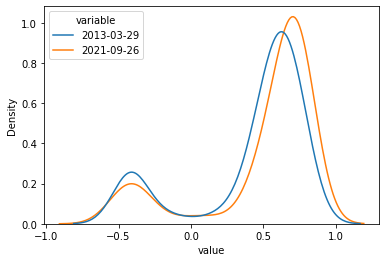

In [80]:
sns.kdeplot(data=hist, x='value', hue='variable')

In [131]:
df = pd.read_csv('hist_df.csv')
df = pd.melt(df)
df.head()

,variable,value
0,2013-03-29,0.534760
1,2013-03-29,0.713285
2,2013-03-29,0.676754
3,2013-03-29,0.725317
4,2013-03-29,0.315145


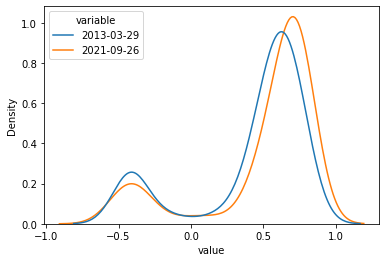

In [138]:
s = sns.kdeplot(data=df, x='value', hue='variable')

In [140]:
before = s.get_lines()[0].get_data()
after = s.get_lines()[1].get_data()

In [166]:
before_df = pd.DataFrame({'x':before[0], 'y':before[1], 'hue':'a'})
after_df = pd.DataFrame({'x':after[0], 'y':after[1], 'hue':'b'})

In [181]:
before_df['y'].max()

1.0309977900575453

In [182]:
before_df['y'].cumsum().div(before_df['y'].cumsum().max())

0      0.000007
1      0.000017
2      0.000029
3      0.000046
4      0.000067
         ...   
195    0.999776
196    0.999858
197    0.999919
198    0.999965
199    1.000000
Name: y, Length: 200, dtype: float64

In [171]:
data = before_df.append(after_df)

In [173]:
data

,x,y,hue
0,-0.908101,0.000340,a
1,-0.897536,0.000452,a
2,-0.886972,0.000596,a
3,-0.876407,0.000780,a
4,-0.865843,0.001014,a
...,...,...,...
195,1.129140,0.002800,b
196,1.139084,0.002161,b
197,1.149027,0.001657,b
198,1.158971,0.001263,b


In [172]:
a = alt.Chart(data).mark_area(opacity=0.3).encode(x='x', y='y', color='hue:N')
# b = alt.Chart(data).mark_area(opacity=0.3, color='blue').encode(x='x1', y='y1')

a

alt.Chart(...)